In [1]:
!pip install kmodes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
from matplotlib import pyplot as plt
from kmodes.kmodes import KModes
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
import joblib

In [3]:
diamonds = pd.read_csv('diamonds_original.csv')

In [4]:
diamonds

carat  clarity  color  cut  depth  table     x     y     z  \
0       1.26        2      4    2   60.6   60.0  6.97  7.00  4.23   
1       0.80        3      4    4   62.1   54.0  5.96  5.99  3.71   
2       0.56        4      2    4   61.7   54.0  5.28  5.32  3.27   
3       1.51        3      6    1   64.0   58.0  7.24  7.27  4.64   
4       0.33        6      5    4   62.2   54.0  4.43  4.45  2.76   
...      ...      ...    ...  ...    ...    ...   ...   ...   ...   
52325   1.02        2      4    2   62.9   59.0  6.38  6.41  4.02   
52326   0.93        2      4    3   61.8   59.0  6.27  6.23  3.86   
52327   0.30        4      5    4   62.4   54.0  4.30  4.32  2.69   
52328   0.36        3      2    4   61.5   55.0  4.60  4.57  2.82   
52329   0.70        1      2    2   60.7   58.0  5.73  5.77  3.49   

               class      volume  
0      (5000, 10000]  206.381695  
1          [0, 5000]  132.448481  
2          [0, 5000]   91.852998  
3      (5000, 10000]  244.225457  
4          [0, 5000]   54.409255  
...              ...         ...  
52325      [0, 5000]  164.401114  
52326      [0, 5000]  150.779702  
52327      [0, 5000]   49.969445  
52328      [0, 5000]   59.282040  
52329      [0, 5000]  115.386729  

[52330 rows x 11 columns]

In [5]:
feature_names = ['carat', 'clarity', 'color',	'cut', 'depth', 'table', 'x', 'y', 'z', 'volume']

In [6]:
X = diamonds[feature_names]
X

carat  clarity  color  cut  depth  table     x     y     z      volume
0       1.26        2      4    2   60.6   60.0  6.97  7.00  4.23  206.381695
1       0.80        3      4    4   62.1   54.0  5.96  5.99  3.71  132.448481
2       0.56        4      2    4   61.7   54.0  5.28  5.32  3.27   91.852998
3       1.51        3      6    1   64.0   58.0  7.24  7.27  4.64  244.225457
4       0.33        6      5    4   62.2   54.0  4.43  4.45  2.76   54.409255
...      ...      ...    ...  ...    ...    ...   ...   ...   ...         ...
52325   1.02        2      4    2   62.9   59.0  6.38  6.41  4.02  164.401114
52326   0.93        2      4    3   61.8   59.0  6.27  6.23  3.86  150.779702
52327   0.30        4      5    4   62.4   54.0  4.30  4.32  2.69   49.969445
52328   0.36        3      2    4   61.5   55.0  4.60  4.57  2.82   59.282040
52329   0.70        1      2    2   60.7   58.0  5.73  5.77  3.49  115.386729

[52330 rows x 10 columns]

In [7]:
y = diamonds['class']
y

0        (5000, 10000]
1            [0, 5000]
2            [0, 5000]
3        (5000, 10000]
4            [0, 5000]
             ...      
52325        [0, 5000]
52326        [0, 5000]
52327        [0, 5000]
52328        [0, 5000]
52329        [0, 5000]
Name: class, Length: 52330, dtype: object

In [8]:
scaler = MinMaxScaler()

In [9]:
X = pd.DataFrame(scaler.fit_transform(X), columns = feature_names)
X

carat   clarity     color   cut     depth  table         x  \
0      0.527363  0.285714  0.666667  0.50  0.364706   0.72  0.661224   
1      0.298507  0.428571  0.666667  1.00  0.541176   0.24  0.455102   
2      0.179104  0.571429  0.333333  1.00  0.494118   0.24  0.316327   
3      0.651741  0.428571  1.000000  0.25  0.764706   0.56  0.716327   
4      0.064677  0.857143  0.833333  1.00  0.552941   0.24  0.142857   
...         ...       ...       ...   ...       ...    ...       ...   
52325  0.407960  0.285714  0.666667  0.50  0.635294   0.64  0.540816   
52326  0.363184  0.285714  0.666667  0.75  0.505882   0.64  0.518367   
52327  0.049751  0.571429  0.833333  1.00  0.576471   0.24  0.116327   
52328  0.079602  0.428571  0.333333  1.00  0.470588   0.32  0.177551   
52329  0.248756  0.142857  0.333333  0.50  0.376471   0.56  0.408163   

              y         z    volume  
0      0.680328  0.716180  0.512314  
1      0.473361  0.578249  0.295469  
2      0.336066  0.461538  0.176404  
3      0.735656  0.824934  0.623309  
4      0.157787  0.326260  0.066582  
...         ...       ...       ...  
52325  0.559426  0.660477  0.389186  
52326  0.522541  0.618037  0.349234  
52327  0.131148  0.307692  0.053560  
52328  0.182377  0.342175  0.080874  
52329  0.428279  0.519894  0.245428  

[52330 rows x 10 columns]

***

Pomocne funkcije za izvestaj o modelu

In [10]:
import matplotlib.cm as cm

def cluster_search(X):
  # pomoćna funkcija za silhouette diagram plot (preuzeto sa https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)
  silhouettes = []
  costs = []

  for n_clusters in [2, 3, 4, 5, 6]:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KModes(n_clusters=n_clusters, n_init=10, random_state=42)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    cost = clusterer.cost_
    silhouettes.append(silhouette_avg)
    costs.append(cost)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.3, -0.2, -0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X['carat'], X['depth'], marker="o", lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centroids_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )
  plt.show()

  return silhouettes, costs

## KModes

In [11]:
kmodes = KModes(n_clusters = 4, random_state=42) 

In [12]:
kmodes.fit(X)

KModes(n_clusters=4, n_init=1, random_state=42)

In [13]:
centers = pd.DataFrame(kmodes.cluster_centroids_)
centers

0         1         2    3         4     5         6         7  \
0  0.049751  0.285714  0.500000  1.0  0.505882  0.40  0.124490  0.141393   
1  0.054726  0.428571  0.166667  1.0  0.564706  0.48  0.120408  0.137295   
2  0.402985  0.285714  0.333333  1.0  0.529412  0.48  0.540816  0.561475   
3  0.059701  0.428571  0.333333  1.0  0.517647  0.40  0.130612  0.145492   

          8         9  
0  0.307692  0.053147  
1  0.310345  0.054103  
2  0.647215  0.392166  
3  0.312997  0.059136

In [14]:
kmodes.cost_

424888.0

In [15]:
s = silhouette_score(X, kmodes.labels_)
s

-0.07607706298949725

In [16]:
silhouette_values = silhouette_samples(X, kmodes.labels_)
silhouette_values

array([-0.09120426, -0.09666393, -0.19859862, ..., -0.14587091,
        0.17679555,  0.10655593])

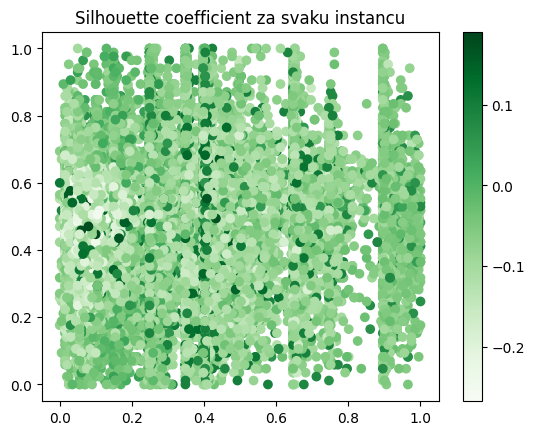

In [17]:
plt.scatter(X['carat'], X['depth'], c = silhouette_values, cmap="Greens")
plt.colorbar()
plt.title("Silhouette coefficient za svaku instancu")
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.002503643163707464
For n_clusters = 3 The average silhouette_score is : -0.03208178400694627
For n_clusters = 4 The average silhouette_score is : -0.07607706298949725
For n_clusters = 5 The average silhouette_score is : -0.07627881592848741
For n_clusters = 6 The average silhouette_score is : -0.0747607810792886


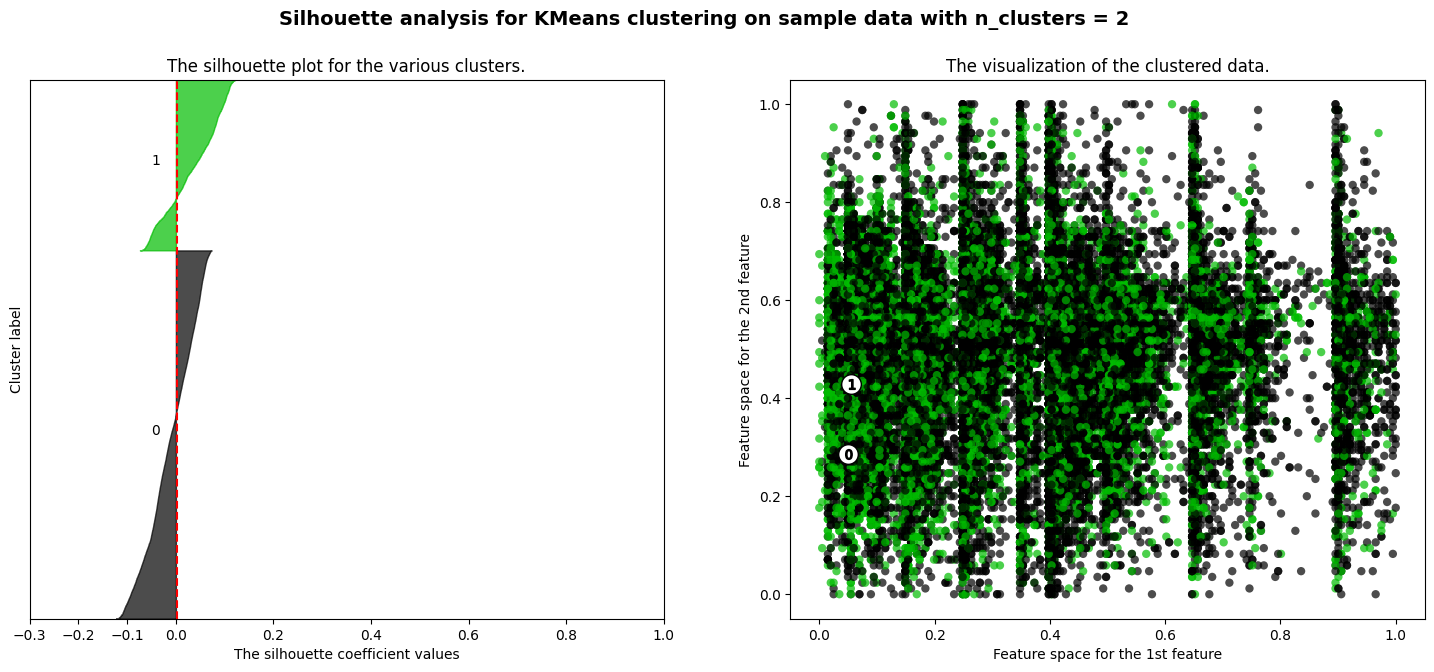

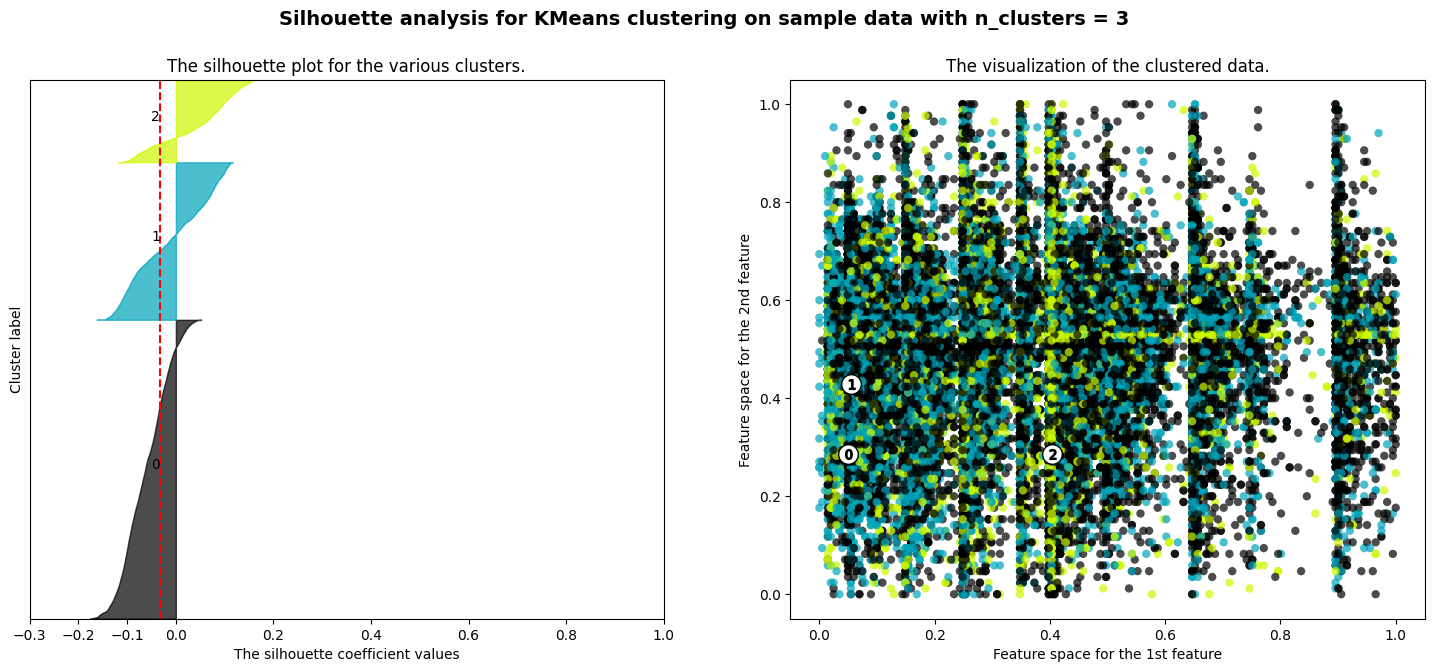

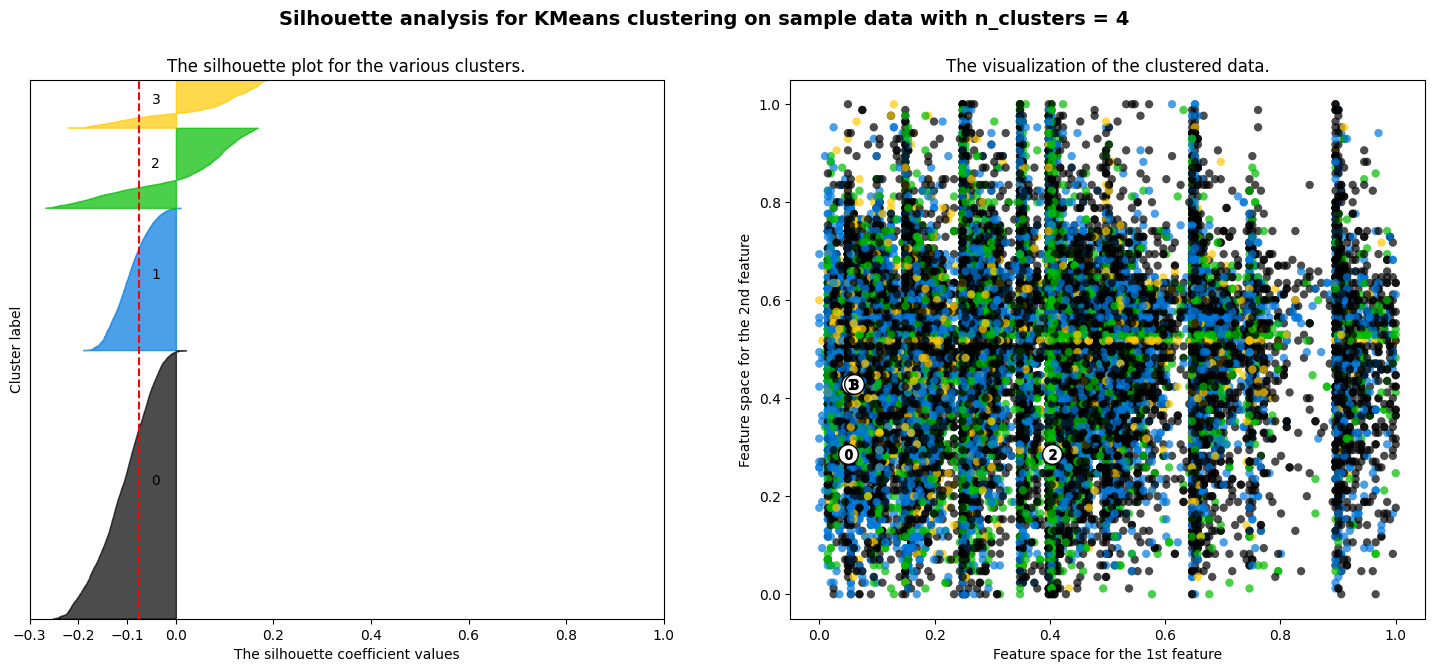

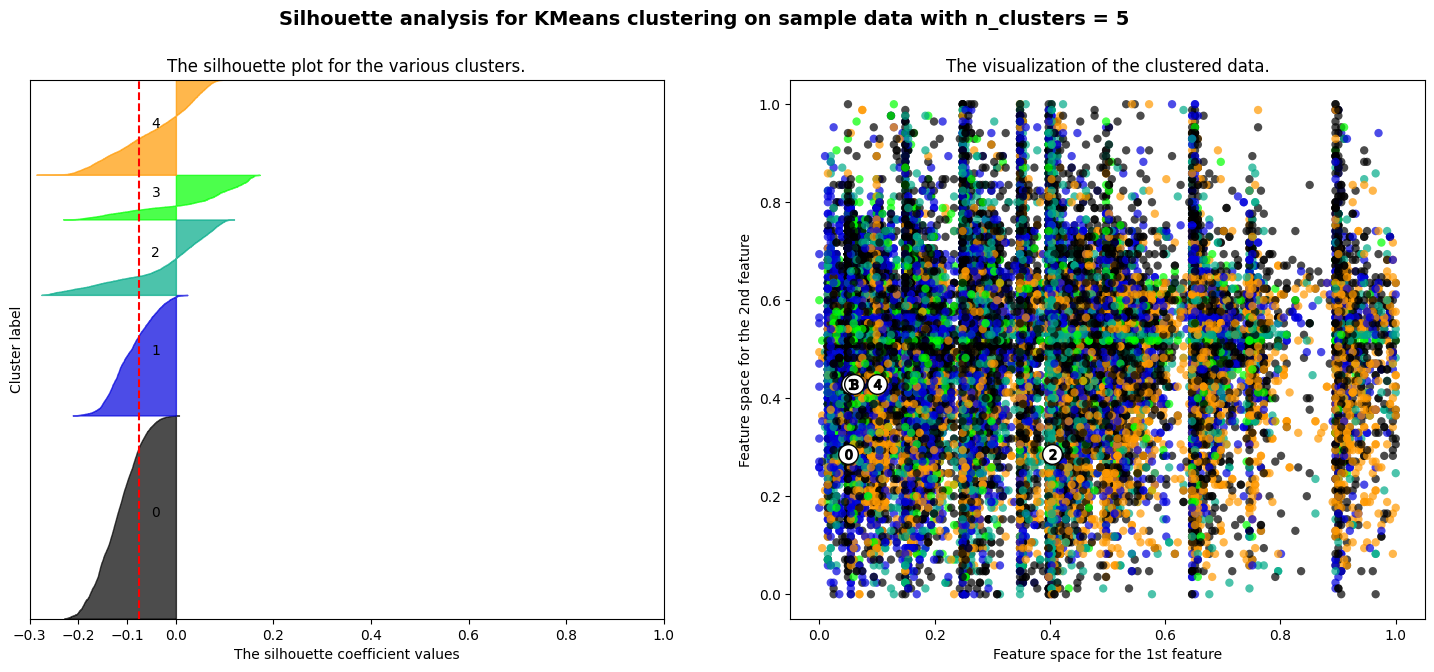

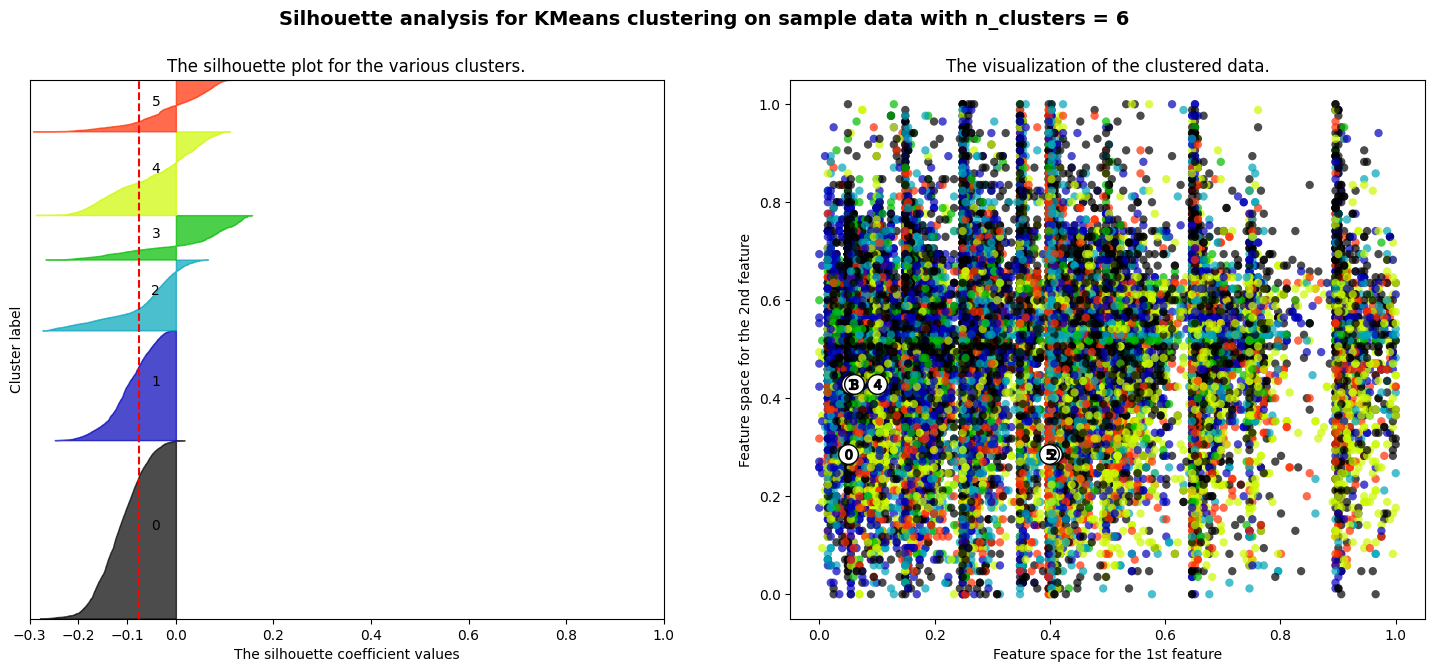

In [18]:
silhouette_scores, cost_scores = cluster_search(X)

KModes nam pokazuje najrealnije stanje: U skupu podataka ne postoje grupacije.
Drugi algoritmi su davali silueta skorove iznad ovoga, ali to je jer oni nisu sposobni za rad za kategorickim vrednostima kao KModes. Kategoricke vrednosti same po sebi prave klastere i tesko je adekvatno meriti rastojanja pa algoritmima to deluje kao jasno definisan klaster

In [19]:
ks = [2, 3, 4, 5, 6]

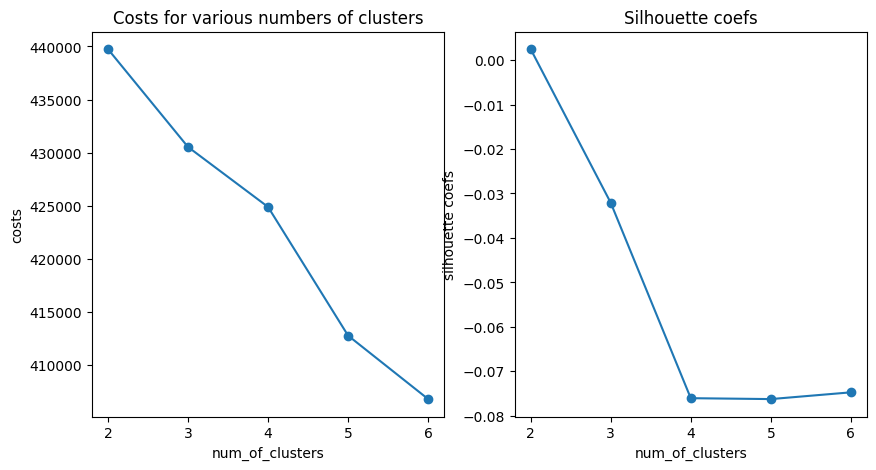

In [20]:
fig = plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(ks, cost_scores, marker='o')
plt.ylabel('costs')
plt.xlabel('num_of_clusters')
plt.title('Costs for various numbers of clusters')

plt.subplot(1, 2, 2)
plt.plot(ks, silhouette_scores, marker="o")
plt.ylabel('silhouette coefs')
plt.xlabel('num_of_clusters')
plt.title('Silhouette coefs')

plt.show()

Vidimo da *cost* nastavlja da opada sto sugerise da i dalje konvergira, ali nema potrebe nastavljati jer smo vec usli u veliki broj klastera i silueta se nece znacajno popraviti 

In [21]:
kmodes = KModes(n_clusters= 2, n_init=10, random_state=42)

In [22]:
kmodes.fit(X)

KModes(n_clusters=2, n_init=1, random_state=42)

In [23]:
clusters = pd.Series(kmodes.labels_)
clusters

0        0
1        1
2        0
3        1
4        0
        ..
52325    0
52326    0
52327    0
52328    1
52329    0
Length: 52330, dtype: uint16

In [24]:
X['cluster'] = clusters

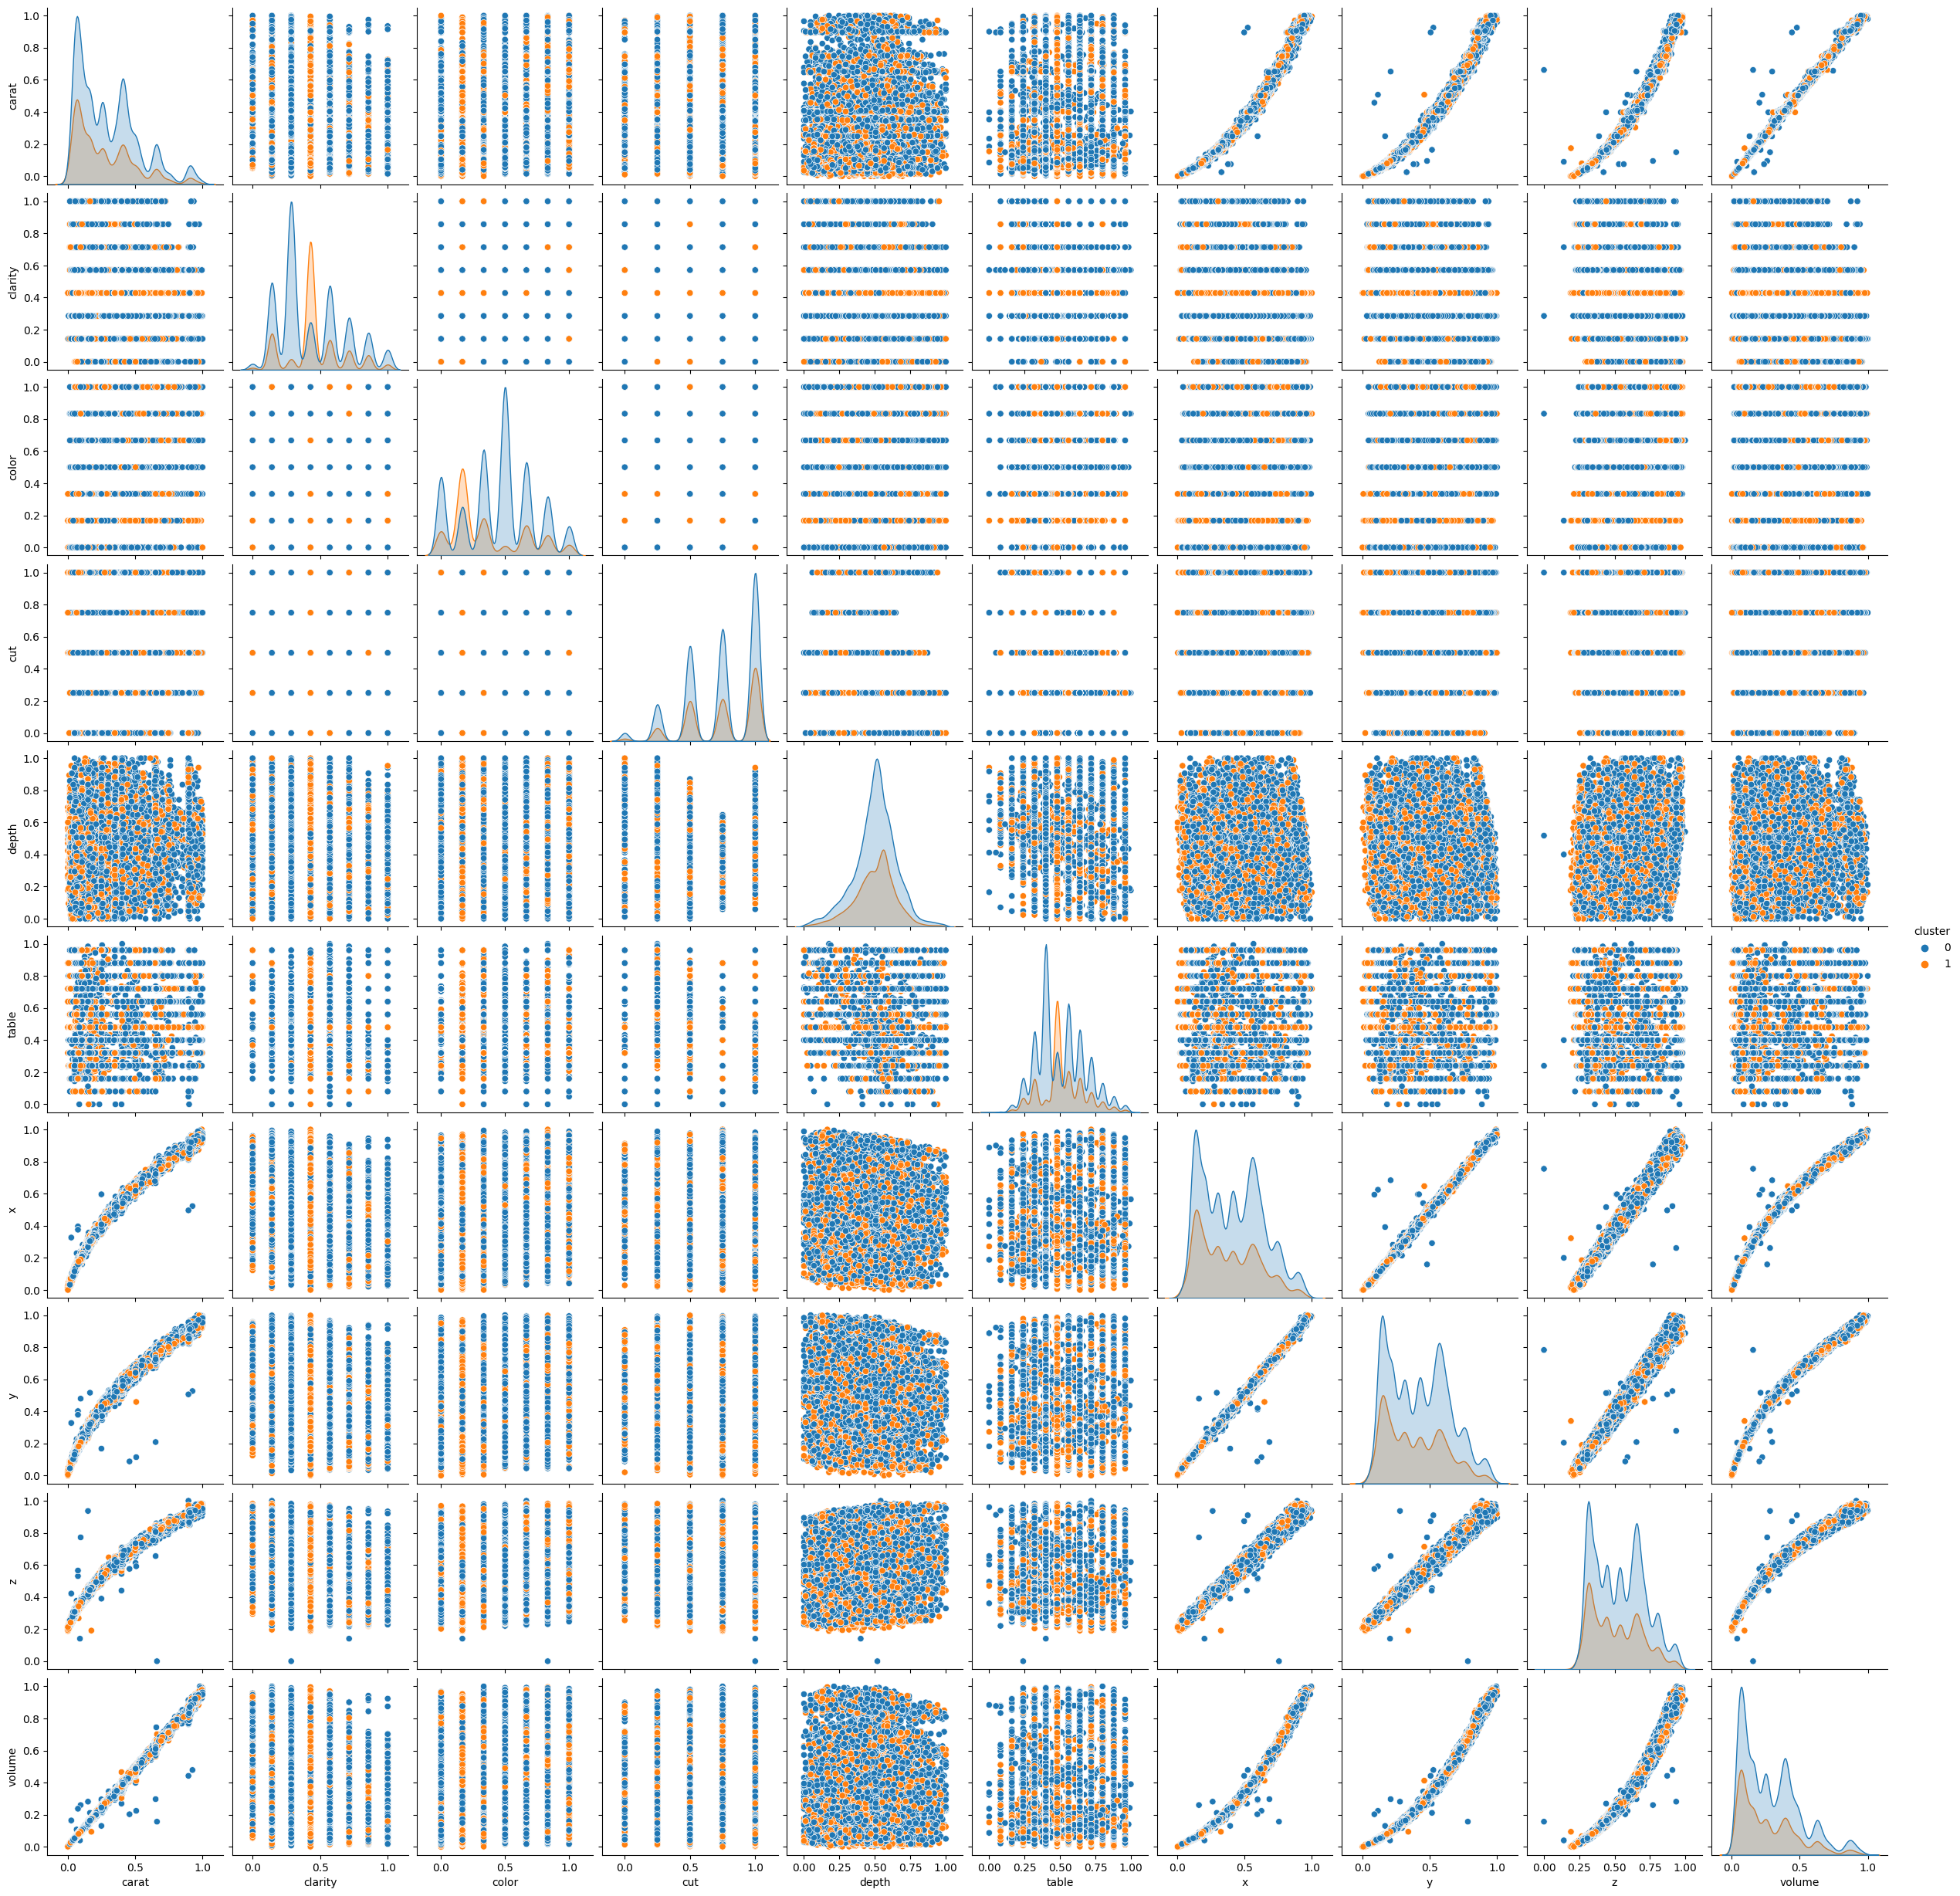

In [25]:
sns.pairplot(X, hue = 'cluster')

Prikazuje veliku rasprsenost i apsolutno nikakve grupacije sto je i ocekivano za skup podataka koji je namenjen za regresivne svrhe


In [26]:
silhouette_values = silhouette_samples(X, kmodes.labels_)
silhouette_values

array([0.35012837, 0.36888991, 0.37919924, ..., 0.30375942, 0.42014937,
       0.38512869])

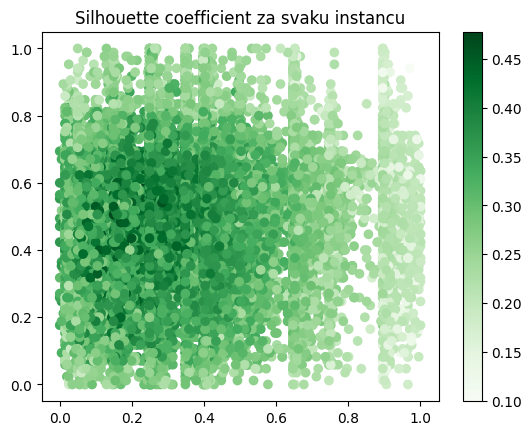

In [28]:
plt.scatter(X['carat'], X['depth'], c = silhouette_values, cmap="Greens")
plt.colorbar()
plt.title("Silhouette coefficient za svaku instancu")
plt.show()

In [29]:
joblib.dump(kmodes, 'KMODES.pkl')

['KMODES.pkl']